In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [4]:
!kaggle datasets download -d gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 96% 2.05G/2.13G [00:21<00:03, 23.1MB/s]
100% 2.13G/2.13G [00:21<00:00, 107MB/s] 


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/leapgestrecog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:


import os
path = '/content/leapGestRecog'
total_images = 0
for dirname, _, filenames in os.walk(path):
    total_images += len(filenames)
print(f"Total images in leapGestRecog: {total_images}")

Total images in leapGestRecog: 20000


In [7]:


import os
import shutil


source_dir = '/content/leapGestRecog'


output_base_dir = '/content/processed_gestures'


os.makedirs(output_base_dir, exist_ok=True)


gesture_names = [
    '01_palm',
    '02_l',
    '03_fist',
    '04_fist_moved',
    '05_thumb',
    '06_index',
    '07_ok',
    '08_palm_moved',
    '09_c',
    '10_down'
]


for gesture_name in gesture_names:
    os.makedirs(os.path.join(output_base_dir, gesture_name), exist_ok=True)


for root, dirs, files in os.walk(source_dir):
    for dir_name in dirs:

        if dir_name in gesture_names:
            source_sub_dir = os.path.join(root, dir_name)
            destination_sub_dir = os.path.join(output_base_dir, dir_name)


            for sub_root, sub_dirs, sub_files in os.walk(source_sub_dir):
                for file in sub_files:

                    source_file_path = os.path.join(sub_root, file)


                    destination_file_path = os.path.join(destination_sub_dir, file)


                    shutil.copy2(source_file_path, destination_file_path)

print("Finished organizing the dataset.")


Finished organizing the dataset.


In [8]:


image_count = 0
for root, dirs, files in os.walk(output_base_dir):
    for file in files:

        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_count += 1

print(f"Total number of images in {output_base_dir}: {image_count}")


Total number of images in /content/processed_gestures: 20000


In [9]:
from sklearn.model_selection import train_test_split
import os
import glob


image_paths = []
labels = []

base_path = '/content/processed_gestures'

for class_name in os.listdir(base_path):
    class_folder = os.path.join(base_path, class_name)
    if os.path.isdir(class_folder):
        for img_path in glob.glob(os.path.join(class_folder, '*')):
            image_paths.append(img_path)
            labels.append(class_name)


train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels, random_state=42
)

print(f"Train: {len(train_paths)} images")
print(f"Test: {len(test_paths)} images")


Train: 16000 images
Test: 4000 images


In [10]:
for i in range(1,10):
   print(train_paths[i] , train_labels[i])

/content/processed_gestures/07_ok/frame_08_07_0136.png 07_ok
/content/processed_gestures/01_palm/frame_04_01_0040.png 01_palm
/content/processed_gestures/10_down/frame_09_10_0157.png 10_down
/content/processed_gestures/08_palm_moved/frame_00_08_0130.png 08_palm_moved
/content/processed_gestures/07_ok/frame_05_07_0052.png 07_ok
/content/processed_gestures/08_palm_moved/frame_08_08_0173.png 08_palm_moved
/content/processed_gestures/01_palm/frame_05_01_0008.png 01_palm
/content/processed_gestures/03_fist/frame_08_03_0104.png 03_fist
/content/processed_gestures/07_ok/frame_08_07_0092.png 07_ok


In [11]:
import os
import shutil


output_base = '/content/split_dataset'


train_base = os.path.join(output_base, 'train')
test_base = os.path.join(output_base, 'test')
os.makedirs(train_base, exist_ok=True)
os.makedirs(test_base, exist_ok=True)

def organize_split(paths, labels, split_type):
    for path, label in zip(paths, labels):

        dest_dir = os.path.join(output_base, split_type, label)
        os.makedirs(dest_dir, exist_ok=True)


        filename = os.path.basename(path)
        dest_path = os.path.join(dest_dir, filename)
        shutil.copy2(path, dest_path)


organize_split(train_paths, train_labels, 'train')
organize_split(test_paths, test_labels, 'test')

print("Directory structure created successfully.")


Directory structure created successfully.


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (64,64)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/split_dataset/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/split_dataset/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , BatchNormalization

In [25]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) ))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,308,234 (4.99 MB)

 Trainable params: 1,307,786 (4.99 MB)

 Non-trainable params: 448 (1.75 KB)

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
history = model.fit(train_generator,epochs=10,validation_data=test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 290s 489ms/step - accuracy: 0.1897 - loss: 2.5626 - val_accuracy: 0.3943 - val_loss: 1.6328
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 227s 455ms/step - accuracy: 0.5043 - loss: 1.3529 - val_accuracy: 0.7707 - val_loss: 0.5685
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 233s 466ms/step - accuracy: 0.7427 - loss: 0.7140 - val_accuracy: 0.9270 - val_loss: 0.2411
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 228s 456ms/step - accuracy: 0.8560 - loss: 0.4269 - val_accuracy: 0.8733 - val_loss: 0.4755
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 229s 458ms/step - accuracy: 0.9016 - loss: 0.3114 - val_accuracy: 0.8555 - val_loss: 0.6836
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 228s 457ms/step - accuracy: 0.9410 - loss: 0.1941 - val_accuracy: 0.9812 - val_loss: 0.0698
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 234s 468ms/step - accuracy: 0.9445 - loss: 0.1936 - val_accuracy: 0.9555 - val_loss: 0.1360
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 229s 457ms/step - accuracy: 0.9602 -

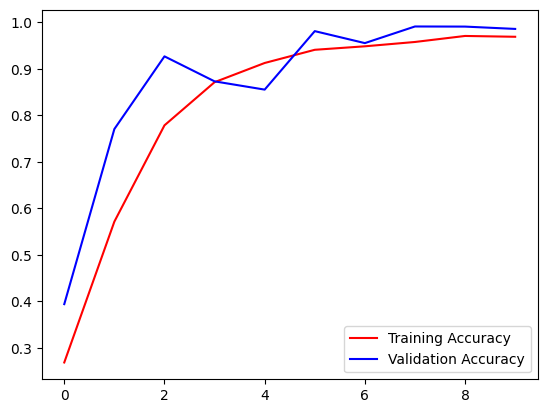

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color='blue', label='Validation Accuracy')

plt.legend()
plt.show()

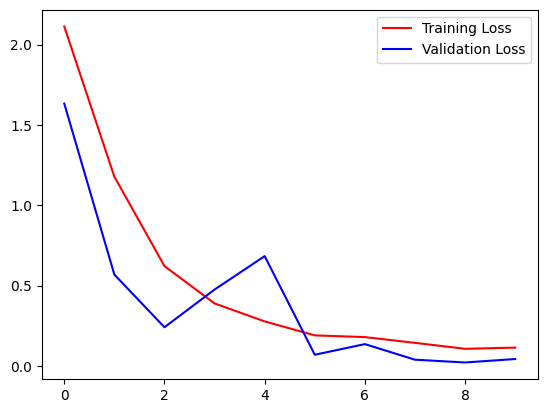

In [29]:
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'],color='blue', label='Validation Loss')

plt.legend()
plt.show()

In [30]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.2%}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.9874 - loss: 0.0364
Test Accuracy: 98.60%


In [34]:
Result = ['A' ,'B' , 'C' ,'D' ,'E' , 'F' , 'G' , 'H' , 'I' , 'J']
paths = ['/content/split_dataset/test/01_palm/frame_00_01_0058.png' ,
         '/content/split_dataset/test/02_l/frame_00_02_0080.png',
         '/content/split_dataset/test/03_fist/frame_00_03_0034.png',
         '/content/split_dataset/test/04_fist_moved/frame_00_04_0119.png',
         '/content/split_dataset/test/05_thumb/frame_00_05_0033.png',
         '/content/split_dataset/test/06_index/frame_00_06_0035.png',
         '/content/split_dataset/test/07_ok/frame_00_07_0048.png',
         '/content/split_dataset/test/08_palm_moved/frame_00_08_0135.png',
         '/content/split_dataset/test/09_c/frame_00_09_0024.png',
         '/content/split_dataset/test/10_down/frame_00_10_0052.png']


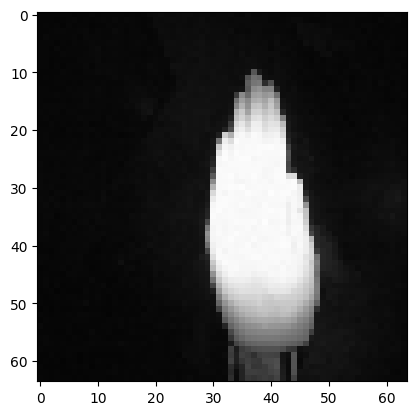

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Actual :  A
Predicted :  A


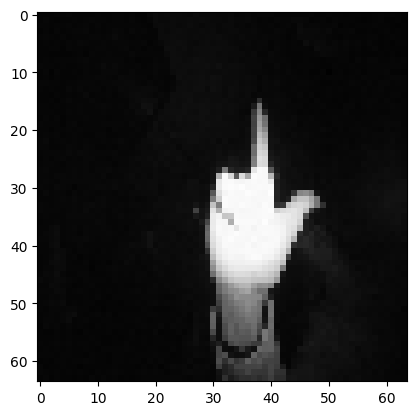

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Actual :  B
Predicted :  B


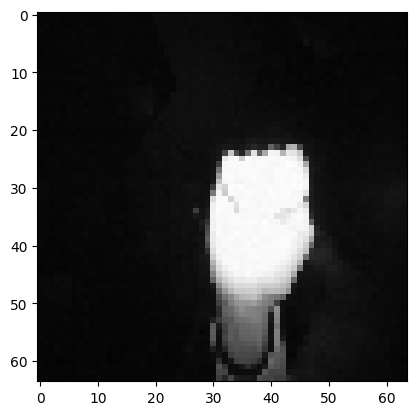

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Actual :  C
Predicted :  C


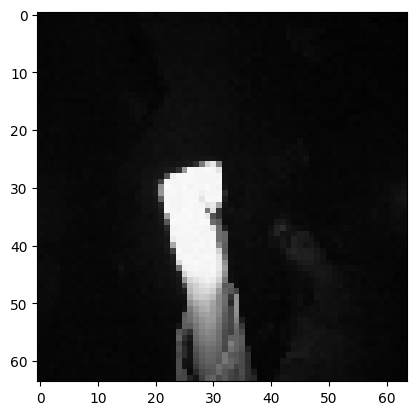

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Actual :  D
Predicted :  D


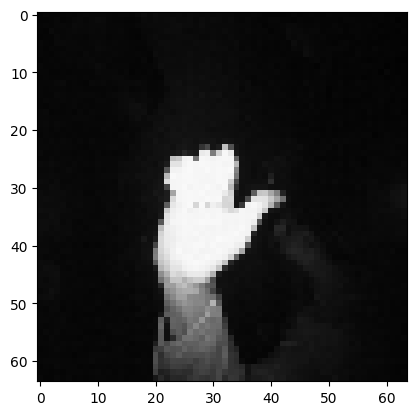

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Actual :  E
Predicted :  E


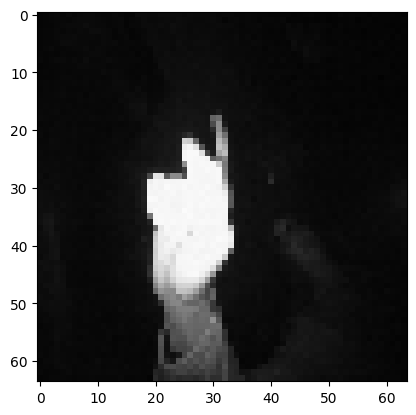

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Actual :  F
Predicted :  F


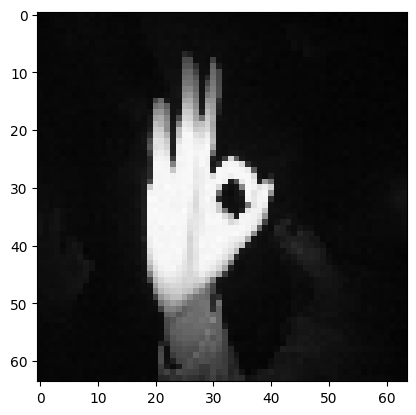

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Actual :  G
Predicted :  G


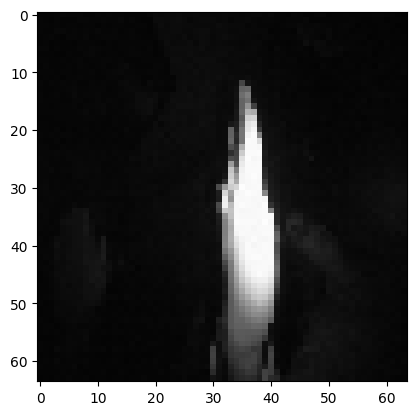

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Actual :  H
Predicted :  H


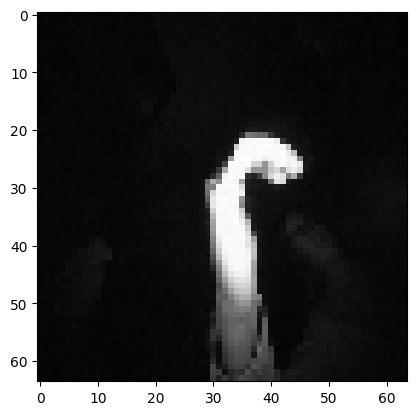

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Actual :  I
Predicted :  I


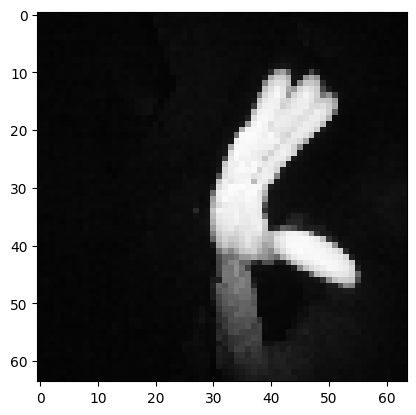

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Actual :  J
Predicted :  J


In [35]:
from tensorflow.keras.preprocessing import image
import numpy as np

for i in range(0,10):

 img = image.load_img(paths[i], target_size=(64, 64))
 plt.imshow(img)
 plt.show()
 img_array = image.img_to_array(img) / 255.0
 img_array = np.expand_dims(img_array, axis=0)

 prediction = model.predict(img_array)

 predicted_class = np.argmax(prediction)
 print("Actual : " ,  Result[i])
 print("Predicted : ", Result[predicted_class])


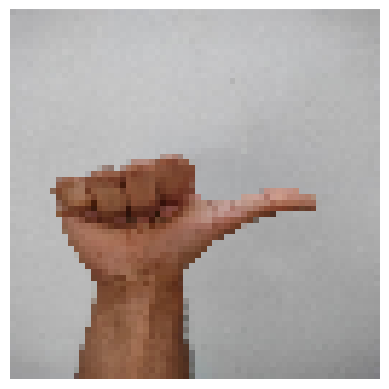

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted class: E


In [64]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/TestE.jpeg'

# Load as RGB
img = image.load_img(img_path, target_size=(64, 64))  # RGB is default
plt.imshow(img)
plt.axis('off')
plt.show()

# Preprocess
img_array = image.img_to_array(img) / 255.0  # (64, 64, 3)
img_array = np.expand_dims(img_array, axis=0)  # (1, 64, 64, 3)

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

print("Predicted class:", Result[predicted_class])

Saved to output_black_bg.jpg
